In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn import under_sampling, over_sampling
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

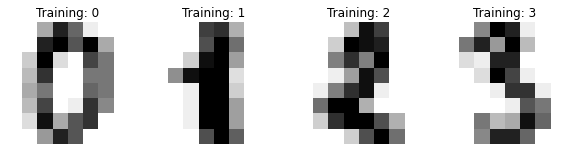

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [3]:
# Linear SVM baseline model with multiclass classification

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.14, shuffle=False)

estimator = SVC(kernel="linear")
classifier = OneVsRestClassifier(estimator)
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)

accuracy 0.8690476190476191 

[[22  0  0  0  1  0  2  0  0  0]
 [ 0 24  0  0  0  0  0  0  2  0]
 [ 0  0 24  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  2  0  2  6  0]
 [ 0  0  0  0 23  0  0  0  0  3]
 [ 0  1  0  0  0 25  0  0  0  0]
 [ 0  0  0  0  1  0 25  0  0  0]
 [ 0  0  0  0  1  0  0 22  2  0]
 [ 1  1  0  0  2  0  0  0 17  1]
 [ 0  1  0  2  0  1  0  1  0 21]] 

Recall metric in the testing dataset: 100.0%


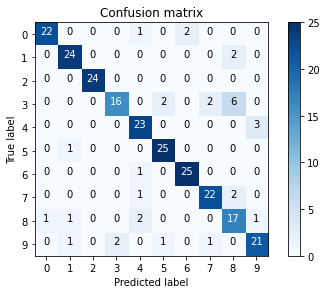

In [4]:


import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix

class_names = [0,1,2,3,4,5,6,7,8,9]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()